In [97]:
import pandas as pd  # Veri işleme
import numpy as np  # Sayısal işlemler
import matplotlib.pyplot as plt  # Veri görselleştirme
import seaborn as sns  # İstatistiksel veri görselleştirme
import gc

In [99]:
games = pd.read_csv('games.csv')
recommendations = pd.read_csv('recommendations.csv')
users = pd.read_csv('users.csv')

In [100]:
print("games.csv başlıkları:", list(games.columns))

games.csv başlıkları: ['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck']


In [101]:
print(games.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0 

In [102]:
print("recommendations.csv başlıkları:", list(recommendations.columns))

recommendations.csv başlıkları: ['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours', 'user_id', 'review_id']


In [103]:
print(recommendations.head())

    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    51580   
1   304390        4      0  2017-02-17           False   11.5     2586   
2  1085660        2      0  2019-11-17            True  336.5   253880   
3   703080        0      0  2022-09-23            True   27.4   259432   
4   526870        0      0  2021-01-10            True    7.9    23869   

   review_id  
0          0  
1          1  
2          2  
3          3  
4          4  


In [104]:
print("users.csv başlıkları:", list(users.columns))

users.csv başlıkları: ['user_id', 'products', 'reviews']


In [105]:
print(users.head())

    user_id  products  reviews
0   7360263       359        0
1  14020781       156        1
2   8762579       329        4
3   4820647       176        4
4   5167327        98        2


In [106]:
print("games.csv eksik değerler:\n", games.isnull().sum())

games.csv eksik değerler:
 app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [107]:
print("\nrecommendations.csv eksik değerler:\n", recommendations.isnull().sum())


recommendations.csv eksik değerler:
 app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [108]:
print("\nusers.csv eksik değerler:\n", users.isnull().sum())


users.csv eksik değerler:
 user_id     0
products    0
reviews     0
dtype: int64


In [109]:
print("games.csv veri tipleri:\n", games.dtypes)

games.csv veri tipleri:
 app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [110]:
print("\nrecommendations.csv veri tipleri:\n", recommendations.dtypes)


recommendations.csv veri tipleri:
 app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [111]:
print("\nusers.csv veri tipleri:\n", users.dtypes)


users.csv veri tipleri:
 user_id     int64
products    int64
reviews     int64
dtype: object


In [112]:
# recommendations.csv'deki date sütununu datetime formatına çevir
recommendations['date'] = pd.to_datetime(recommendations['date'], errors='coerce')

# date sütunundaki hatalı dönüşümleri kontrol et (NaT olanlar)
print("Date sütununda hatalı dönüşüm (NaT) sayısı:", recommendations['date'].isnull().sum())

Date sütununda hatalı dönüşüm (NaT) sayısı: 0


In [113]:
# recommendations
recommendations['is_recommended'] = recommendations['is_recommended'].astype('bool')
recommendations['hours'] = recommendations['hours'].astype('float32')

# games
games['price_final'] = games['price_final'].astype('float32')
games['positive_ratio'] = games['positive_ratio'].astype('int16')

# users
users['products'] = users['products'].astype('int16')
users['reviews'] = users['reviews'].astype('int16')

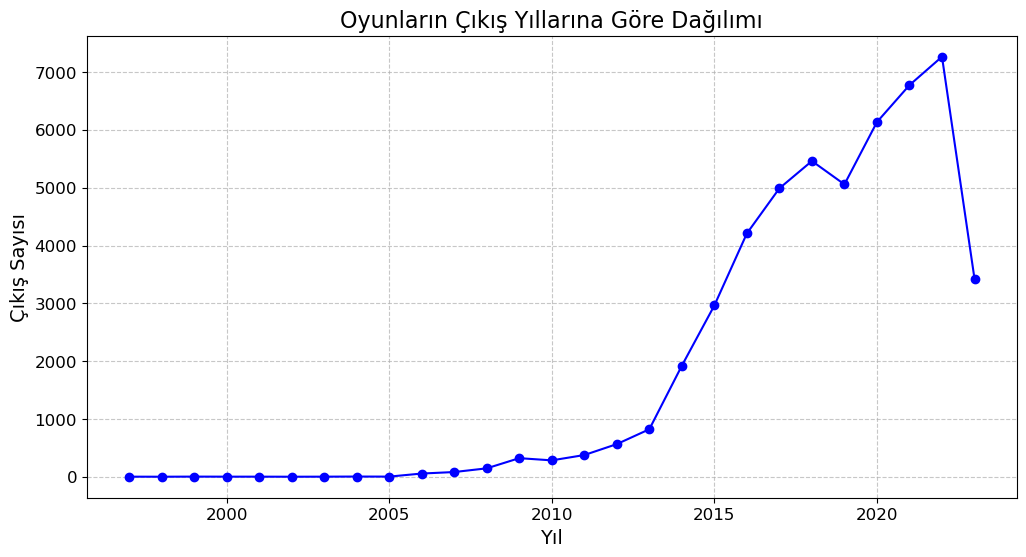

In [114]:
games['date_release'] = pd.to_datetime(games['date_release'], errors='coerce')

# Yıllara göre oyun çıkış sayısını hesapla
games['release_year'] = games['date_release'].dt.year
yearly_releases = games['release_year'].value_counts().sort_index()

# Çizgi grafiği oluştur
plt.figure(figsize=(12, 6))
plt.plot(yearly_releases.index, yearly_releases.values, marker='o', linestyle='-', color='b')
plt.title("Oyunların Çıkış Yıllarına Göre Dağılımı", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Çıkış Sayısı", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


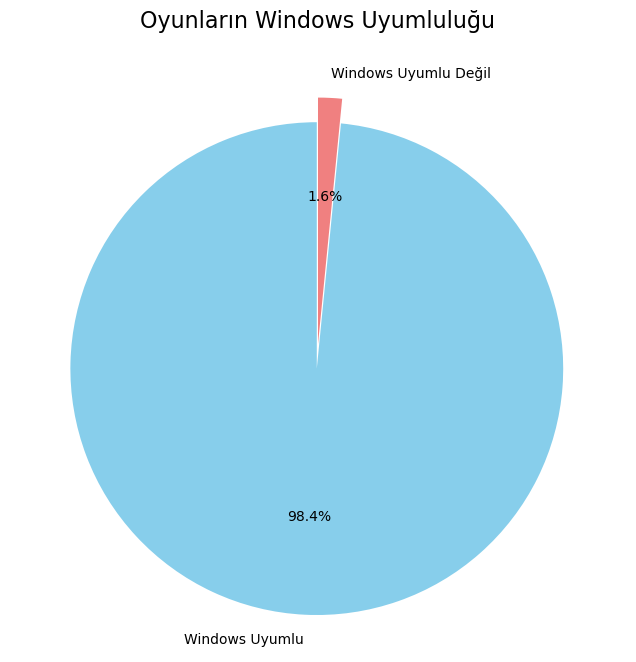

15394

In [131]:
# Geçici bir veri seti oluştur
temp_dataset = games[['win']].copy()

# Windows uyumluluğuna göre oyunları gruplandır
win_counts = temp_dataset['win'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(
    win_counts,
    labels=['Windows Uyumlu', 'Windows Uyumlu Değil'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.1, 0]  # Windows uyumlu olan kısmı vurgula
)
plt.title("Oyunların Windows Uyumluluğu", fontsize=16)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

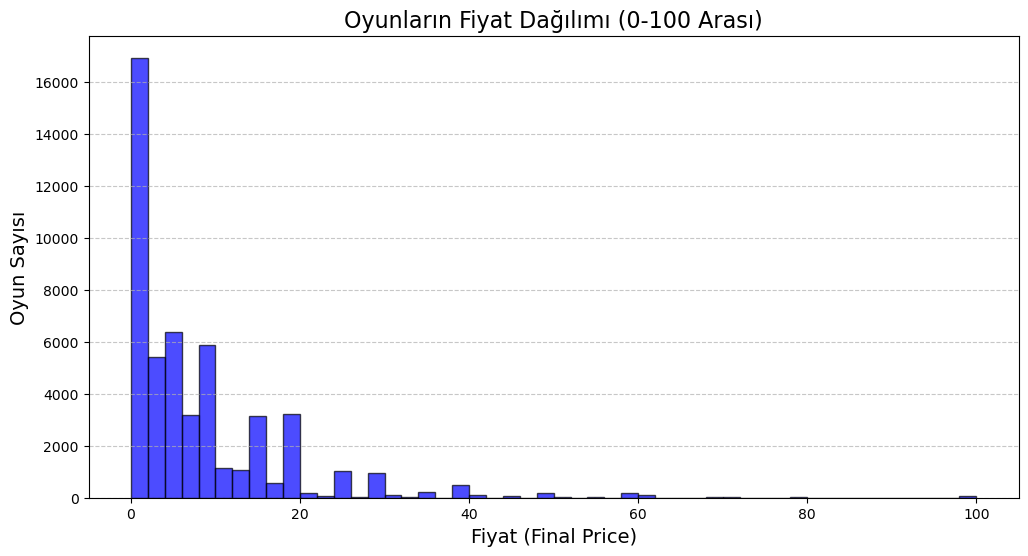

5729

In [133]:
# Geçici bir veri seti oluştur
temp_dataset = games[games['price_final'] <= 100]['price_final'].copy()

# Ayrıntılı histogram
plt.figure(figsize=(12, 6))
plt.hist(temp_dataset, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Oyunların Fiyat Dağılımı (0-100 Arası)", fontsize=16)
plt.xlabel("Fiyat (Final Price)", fontsize=14)
plt.ylabel("Oyun Sayısı", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

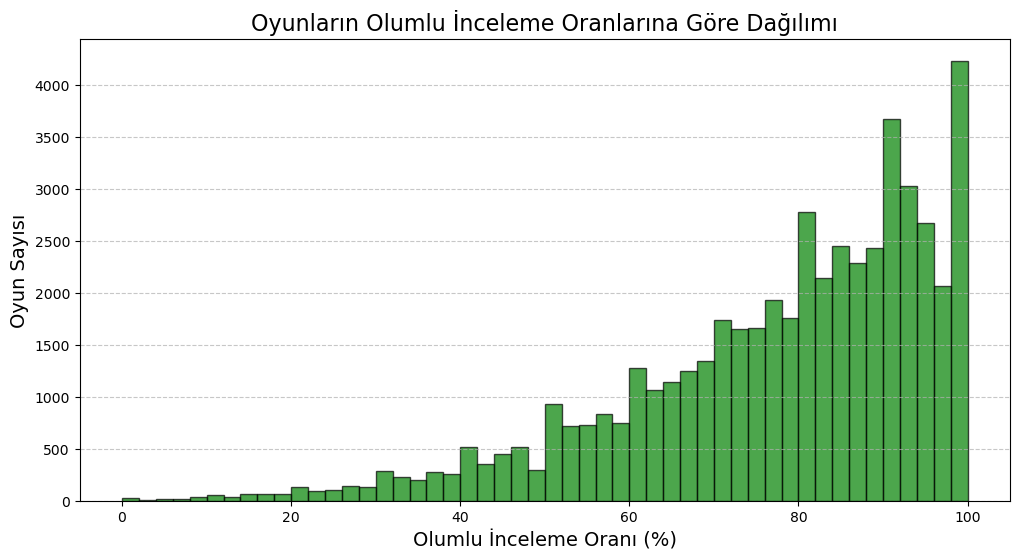

5729

In [135]:
# Geçici bir veri seti oluştur
temp_dataset = games[['positive_ratio']].copy()

# Olumlu inceleme oranlarına göre histogram
plt.figure(figsize=(12, 6))
plt.hist(temp_dataset['positive_ratio'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title("Oyunların Olumlu İnceleme Oranlarına Göre Dağılımı", fontsize=16)
plt.xlabel("Olumlu İnceleme Oranı (%)", fontsize=14)
plt.ylabel("Oyun Sayısı", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

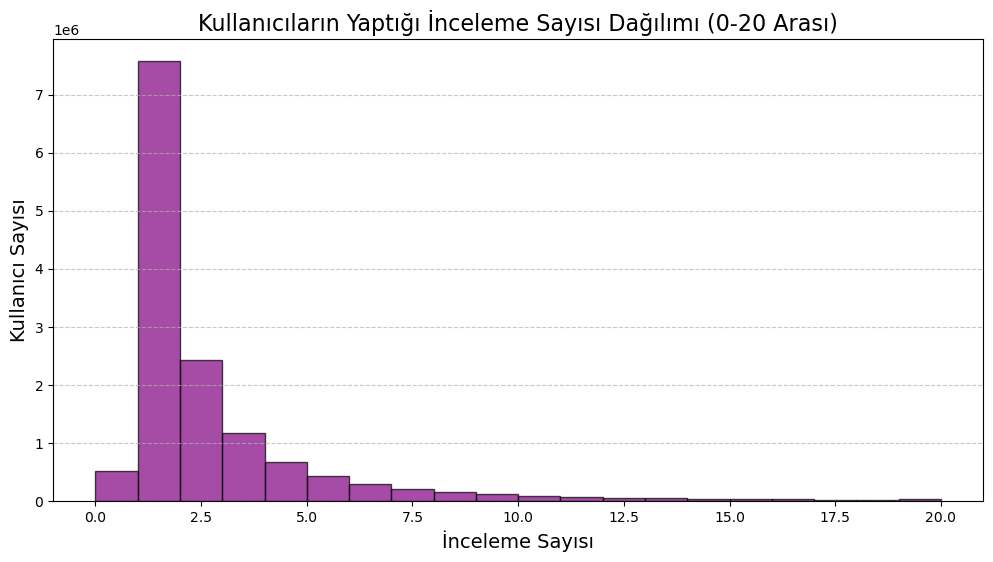

4398

In [137]:
# Geçici bir veri seti oluştur
temp_dataset = users[users['reviews'] <= 20]['reviews'].copy()

# Ayrıntılı histogram
plt.figure(figsize=(12, 6))
plt.hist(temp_dataset, bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title("Kullanıcıların Yaptığı İnceleme Sayısı Dağılımı (0-20 Arası)", fontsize=16)
plt.xlabel("İnceleme Sayısı", fontsize=14)
plt.ylabel("Kullanıcı Sayısı", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()


In [139]:
# 1. Oyunların olumlu inceleme oranı ile kullanıcı inceleme sayısı arasındaki ilişki
correlation_positive_user_reviews = games[['positive_ratio', 'user_reviews']].corr().iloc[0, 1]
print("Olumlu inceleme oranı ile kullanıcı inceleme sayısı arasındaki korelasyon: ", correlation_positive_user_reviews)

Olumlu inceleme oranı ile kullanıcı inceleme sayısı arasındaki korelasyon:  0.021067961210372615


In [141]:
# 2. Oyunların fiyatı ile olumlu inceleme oranı arasındaki ilişki
correlation_price_positive_ratio = games[['price_final', 'positive_ratio']].corr().iloc[0, 1]
print("Oyunların fiyatı ile olumlu inceleme oranı arasındaki korelasyon: ", correlation_price_positive_ratio)

Oyunların fiyatı ile olumlu inceleme oranı arasındaki korelasyon:  -0.009989409655172286


In [143]:
# 3. Oyunların oynanma süresi ile tavsiye edilme oranı arasındaki ilişki
# Dönüştürme: is_recommended (bool) -> int
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)
correlation_hours_recommended = recommendations[['hours', 'is_recommended']].corr().iloc[0, 1]
print("Oynanma süresi ile tavsiye edilme oranı arasındaki korelasyon: ", correlation_hours_recommended)

Oynanma süresi ile tavsiye edilme oranı arasındaki korelasyon:  0.045541765155456354


In [145]:
# 4. Oyunların oynanma süresi ile "helpful" inceleme sayısı arasındaki ilişki
correlation_hours_helpful = recommendations[['hours', 'helpful']].corr().iloc[0, 1]
print("Oynanma süresi ile 'helpful' inceleme sayısı arasındaki korelasyon: ", correlation_hours_helpful)

Oynanma süresi ile 'helpful' inceleme sayısı arasındaki korelasyon:  0.007746177436097456


In [147]:
# 5. Kullanıcıların yaptığı inceleme sayısı ile sahip oldukları ürün sayısı arasındaki ilişki
correlation_reviews_products = users[['reviews', 'products']].corr().iloc[0, 1]
print("Kullanıcıların yaptığı inceleme sayısı ile sahip oldukları ürün sayısı arasındaki korelasyon: ", correlation_reviews_products)

Kullanıcıların yaptığı inceleme sayısı ile sahip oldukları ürün sayısı arasındaki korelasyon:  0.2446899783583081


In [149]:
# 6. Oyunların fiyatı ile kullanıcı inceleme sayısı
correlation_price_reviews = games[['price_final', 'user_reviews']].corr().iloc[0, 1]
print("Oyunların fiyatı ile kullanıcı inceleme sayısı arasındaki korelasyon: ", correlation_price_reviews)


Oyunların fiyatı ile kullanıcı inceleme sayısı arasındaki korelasyon:  0.03134282799985043


In [151]:
# 7. Oyunların fiyatı ile indirim oranı
correlation_price_discount = games[['price_final', 'discount']].corr().iloc[0, 1]
print("Oyunların fiyatı ile indirim oranı arasındaki korelasyon: ", correlation_price_discount)


Oyunların fiyatı ile indirim oranı arasındaki korelasyon:  -0.13751641956444302


In [153]:
# 8. Oyunların olumlu inceleme oranı ile tavsiye edilme oranı
# Dönüştürme: is_recommended (bool) -> int
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)
correlation_positive_recommended = games[['positive_ratio']].merge(
    recommendations[['is_recommended']], left_index=True, right_index=True).corr().iloc[0, 1]
print("Olumlu inceleme oranı ile tavsiye edilme oranı arasındaki korelasyon: ", correlation_positive_recommended)

Olumlu inceleme oranı ile tavsiye edilme oranı arasındaki korelasyon:  0.0028245196169710573


In [155]:
# 9. Kullanıcıların sahip oldukları ürün sayısı ile yaptıkları inceleme sayısı
correlation_products_reviews = users[['products', 'reviews']].corr().iloc[0, 1]
print("Kullanıcıların sahip oldukları ürün sayısı ile yaptıkları inceleme sayısı arasındaki korelasyon: ", correlation_products_reviews)

Kullanıcıların sahip oldukları ürün sayısı ile yaptıkları inceleme sayısı arasındaki korelasyon:  0.2446899783583081


In [157]:
# 1. Ortalama oynama sürelerini karşılaştırma
average_hours = recommendations.groupby('is_recommended')['hours'].mean()
print("Ortalama oynama süreleri (is_recommended bazında):\n", average_hours)

Ortalama oynama süreleri (is_recommended bazında):
 is_recommended
0     80.893562
1    103.868210
Name: hours, dtype: float32


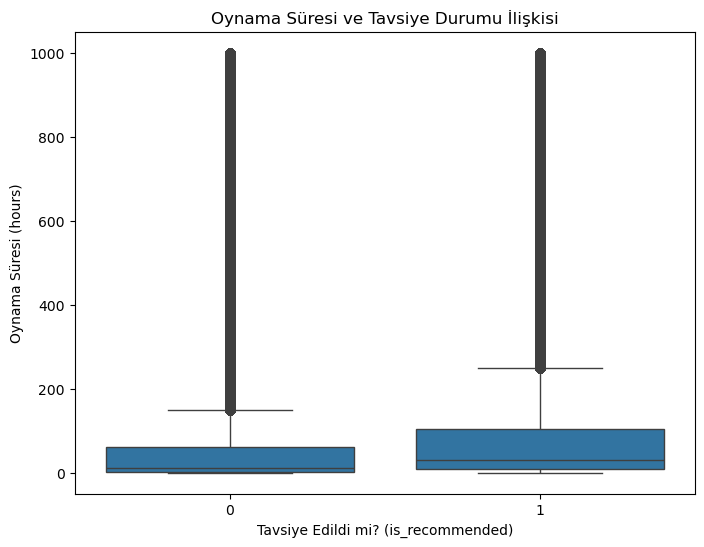

145

In [159]:
# Geçici bir veri seti oluştur
temp_dataset = recommendations[['is_recommended', 'hours']].copy()

# Kutu grafiği (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=temp_dataset, x='is_recommended', y='hours')
plt.title("Oynama Süresi ve Tavsiye Durumu İlişkisi")
plt.xlabel("Tavsiye Edildi mi? (is_recommended)")
plt.ylabel("Oynama Süresi (hours)")
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

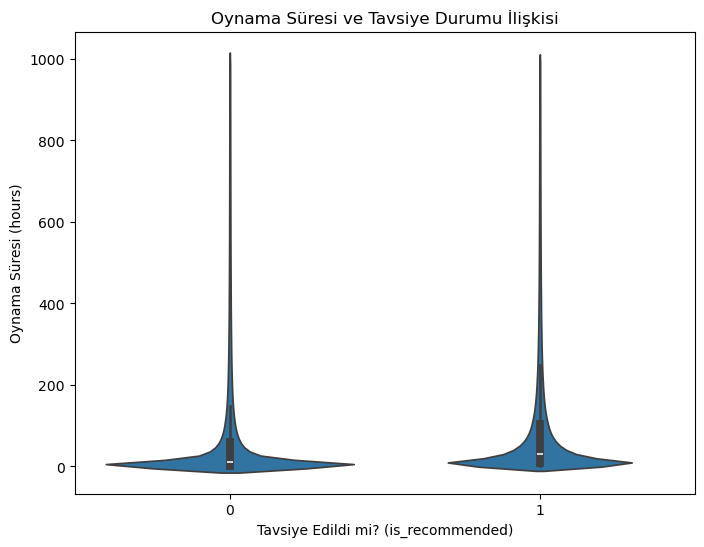

3331

In [161]:
# Geçici bir veri seti oluştur
temp_dataset = recommendations[['is_recommended', 'hours']].copy()

# Violin grafiği (isteğe bağlı)
plt.figure(figsize=(8, 6))
sns.violinplot(data=temp_dataset, x='is_recommended', y='hours')
plt.title("Oynama Süresi ve Tavsiye Durumu İlişkisi")
plt.xlabel("Tavsiye Edildi mi? (is_recommended)")
plt.ylabel("Oynama Süresi (hours)")
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

Oynama Süresi Aralıklarına Göre Tavsiye Edilme Oranları:
 hours_range
0-1    0.623062
2-3    0.781847
4-5    0.836211
6-7    0.857670
8-9    0.870927
Name: is_recommended, dtype: float64


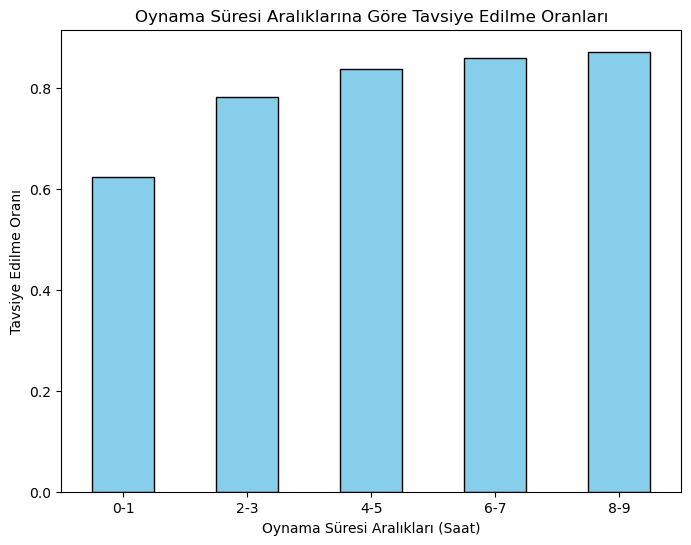

5813

In [163]:
# Geçici bir veri seti oluştur
temp_dataset = recommendations.copy()

# Oynama süresi aralıkları oluşturma
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-1', '2-3', '4-5', '6-7', '8-9']
temp_dataset['hours_range'] = pd.cut(temp_dataset['hours'], bins=bins, labels=labels, right=False)

# Her aralıktaki tavsiye edilme oranını hesaplama
recommendation_rates = temp_dataset.groupby('hours_range', observed=False)['is_recommended'].mean()

# Sonuçları yazdırma
print("Oynama Süresi Aralıklarına Göre Tavsiye Edilme Oranları:\n", recommendation_rates)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(8, 6))
recommendation_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Oynama Süresi Aralıklarına Göre Tavsiye Edilme Oranları")
plt.xlabel("Oynama Süresi Aralıkları (Saat)")
plt.ylabel("Tavsiye Edilme Oranı")
plt.xticks(rotation=0)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

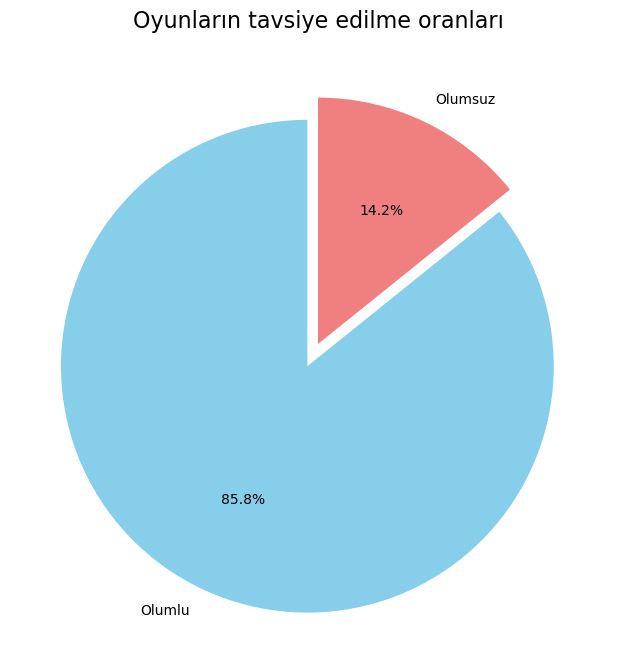

2102

In [165]:
# Geçici bir veri seti oluştur
temp_dataset = recommendations['is_recommended'].copy()

# Olumlu olumsuz oranlarını görselleştir
is_recommended_counts = temp_dataset.value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(
    is_recommended_counts,
    labels=['Olumlu', 'Olumsuz'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.1, 0]  # Olumlu kısmı vurgula
)
plt.title("Oyunların tavsiye edilme oranları", fontsize=16)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

In [167]:
# games ve recommendations'ı app_id'ye göre birleştirme
games_recommendations = pd.merge(recommendations, games, on='app_id', how='inner')

# games_recommendations ile users'ı user_id'ye göre birleştirme
merged_dataset = pd.merge(games_recommendations, users, on='user_id', how='inner')

# Birleştirilen veri setinin özetini görüntüleme
print(merged_dataset.info())
print(merged_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 23 columns):
 #   Column          Dtype         
---  ------          -----         
 0   app_id          int64         
 1   helpful         int64         
 2   funny           int64         
 3   date            datetime64[ns]
 4   is_recommended  int32         
 5   hours           float32       
 6   user_id         int64         
 7   review_id       int64         
 8   title           object        
 9   date_release    datetime64[ns]
 10  win             bool          
 11  mac             bool          
 12  linux           bool          
 13  rating          object        
 14  positive_ratio  int16         
 15  user_reviews    int64         
 16  price_final     float32       
 17  price_original  float64       
 18  discount        float64       
 19  steam_deck      bool          
 20  release_year    int32         
 21  products        int16         
 22  reviews         

In [168]:
print("\nyeni veri seti eksik değerler:\n", merged_dataset.isnull().sum())


yeni veri seti eksik değerler:
 app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
release_year      0
products          0
reviews           0
dtype: int64


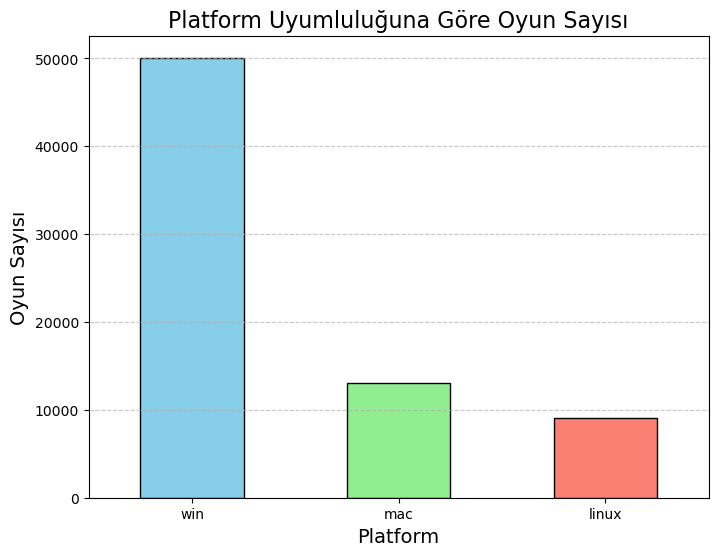

3577

In [171]:
# Geçici bir veri seti oluştur
temp_dataset = games[['win', 'mac', 'linux']].copy()

# Platform uyumluluğuna göre oyun sayısı
platform_counts = temp_dataset.sum()

# Bar grafiği
plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("Platform Uyumluluğuna Göre Oyun Sayısı", fontsize=16)
plt.xlabel("Platform", fontsize=14)
plt.ylabel("Oyun Sayısı", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

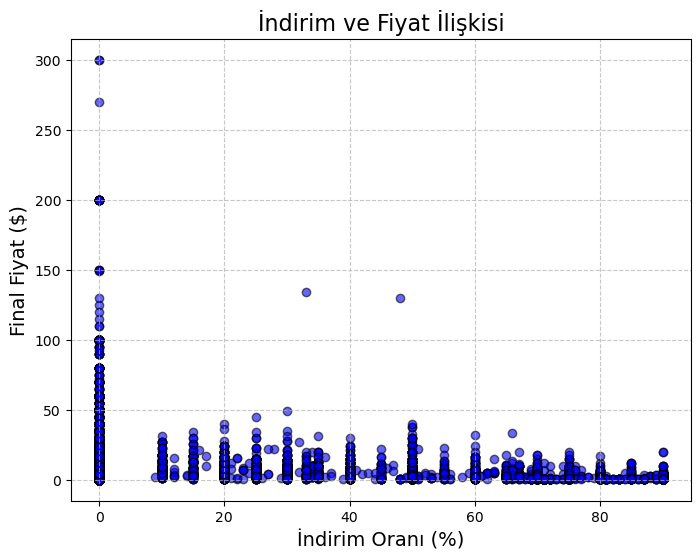

3113

In [173]:
# Geçici bir veri seti oluştur
temp_dataset = games[['discount', 'price_final']].copy()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp_dataset['discount'], temp_dataset['price_final'], alpha=0.6, c='blue', edgecolor='black')
plt.title("İndirim ve Fiyat İlişkisi", fontsize=16)
plt.xlabel("İndirim Oranı (%)", fontsize=14)
plt.ylabel("Final Fiyat ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

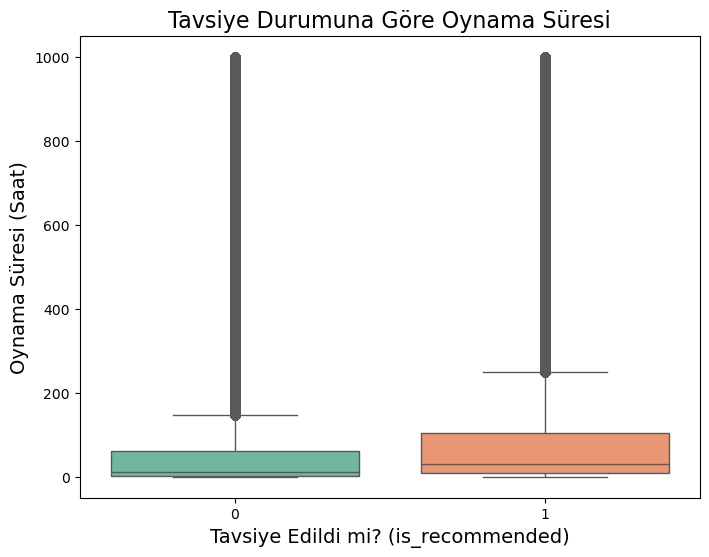

399

In [175]:
# Geçici bir veri seti oluştur
temp_dataset = recommendations[['is_recommended', 'hours']].copy()

# Tavsiye edilme durumuna göre oynama süresi
plt.figure(figsize=(8, 6))
sns.boxplot(data=temp_dataset, x='is_recommended', y='hours', hue='is_recommended', palette='Set2', dodge=False)
plt.title("Tavsiye Durumuna Göre Oynama Süresi", fontsize=16)
plt.xlabel("Tavsiye Edildi mi? (is_recommended)", fontsize=14)
plt.ylabel("Oynama Süresi (Saat)", fontsize=14)
plt.legend([], [], frameon=False)  # Gereksiz bir efsaneyi kaldırmak için
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()


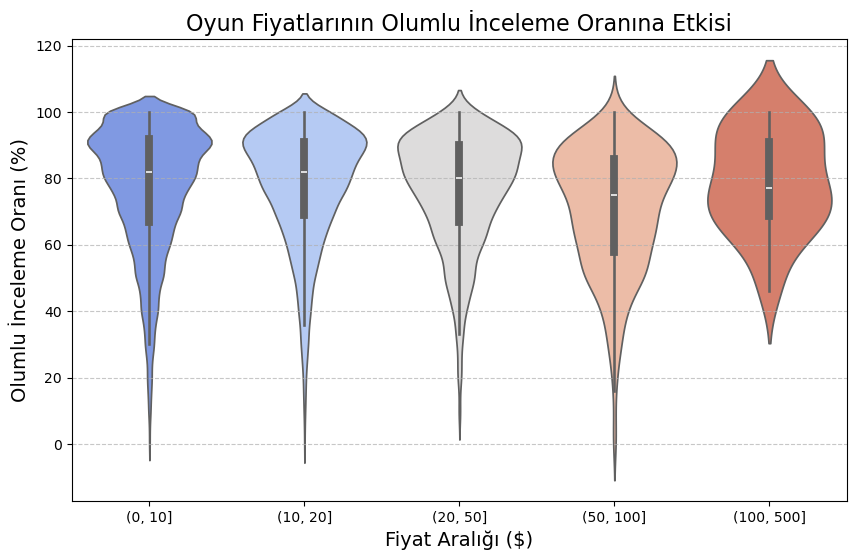

4035

In [177]:
# Geçici bir veri seti oluştur
temp_dataset = games.copy()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=temp_dataset,
    x=pd.cut(temp_dataset['price_final'], bins=[0, 10, 20, 50, 100, 500]),
    y='positive_ratio',
    hue=pd.cut(temp_dataset['price_final'], bins=[0, 10, 20, 50, 100, 500]),
    palette='coolwarm',
    dodge=False
)
plt.title("Oyun Fiyatlarının Olumlu İnceleme Oranına Etkisi", fontsize=16)
plt.xlabel("Fiyat Aralığı ($)", fontsize=14)
plt.ylabel("Olumlu İnceleme Oranı (%)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)  # Efsaneyi kaldırmak için
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

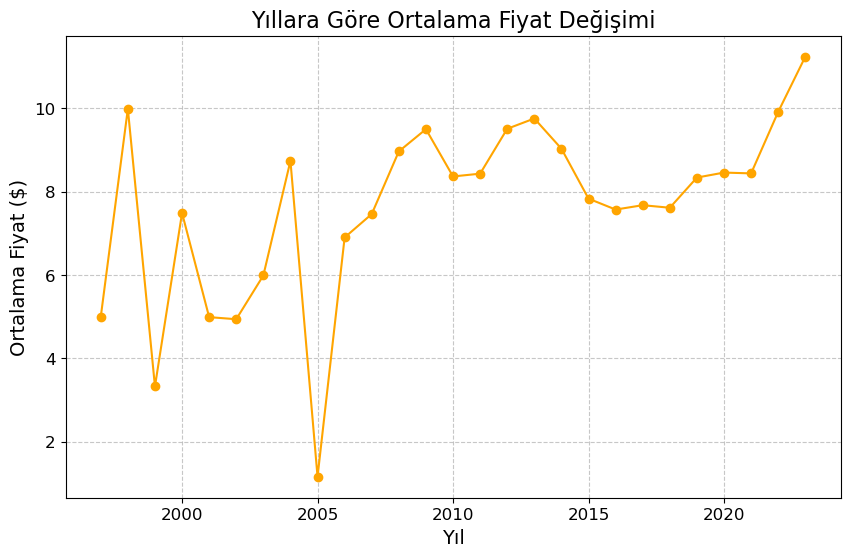

7299

In [179]:
# Geçici bir veri seti oluştur
temp_dataset = games[['release_year', 'price_final']].copy()

# Yıllara göre ortalama fiyat
average_price_by_year = temp_dataset.groupby('release_year')['price_final'].mean()

# Çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', linestyle='-', color='orange')
plt.title("Yıllara Göre Ortalama Fiyat Değişimi", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Ortalama Fiyat ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Geçici veri setini serbest bırak
del temp_dataset
gc.collect()

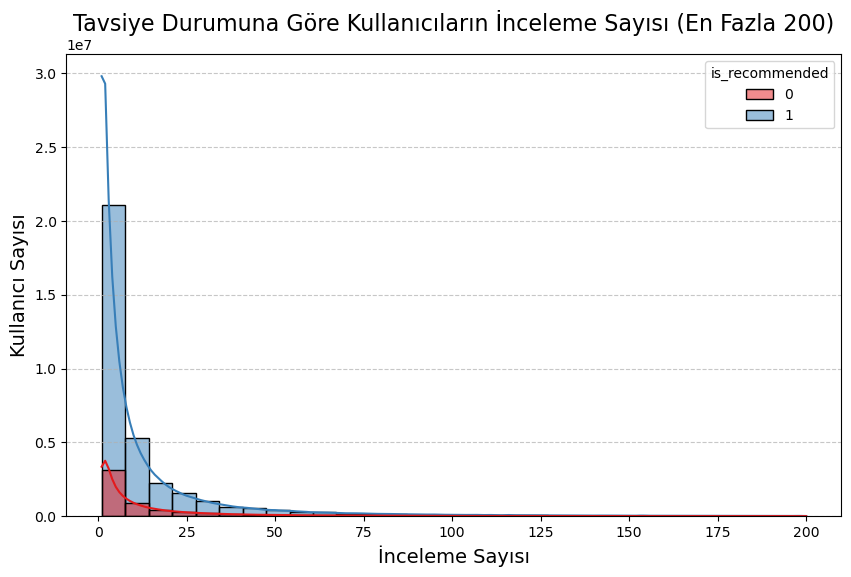

141

In [181]:
# Geçici bir veri setiyle grafiği çizme
temp_dataset = merged_dataset[merged_dataset['reviews'] <= 200]
plt.figure(figsize=(10, 6))
sns.histplot(data=temp_dataset, x='reviews', hue='is_recommended', bins=30, kde=True, palette='Set1')
plt.title("Tavsiye Durumuna Göre Kullanıcıların İnceleme Sayısı (En Fazla 200)", fontsize=16)
plt.xlabel("İnceleme Sayısı", fontsize=14)
plt.ylabel("Kullanıcı Sayısı", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
del temp_dataset  # Geçici veri setini serbest bırak
gc.collect()